<br><br><br><br><br>

# Numpy (and Pandas) skills

<br><br><br><br><br>

<br><br><br><br><br><br>

<b>Why use Python for data analysis?</b>

<br><br><br><br><br><br>

<img src="img/pypl-2019.png" width="100%">

<br><br><br>

<img src="img/python-r-cpp-googletrends-machinelearning.png" width="100%">

<br><br><br>

<br>

<img src="img/root-spark-pandas-google-trends.png" width="100%">

<br>

<center><img src="img/mentions-of-programming-languages.png" width="70%"></center>

<center><img src="img/ligo-notebook.png" width="60%"></center>

<img src="img/shells-1.png" width="70%"><i>(Stolen from Jake Vanderplas.)</i>

<img src="img/shells-2.png" width="70%"><i>(Stolen from Jake Vanderplas.)</i>

<img src="img/shells-3.png" width="70%"><i>(Stolen from Jake Vanderplas.)</i>

<img src="img/shells-4.png" width="70%"><i>(Stolen from Jake Vanderplas.)</i>

<img src="img/shells-5.png" width="70%"><i>(Stolen from Jake Vanderplas.)</i>

### The key to ecosystem development was a common array library

| Date | Development |
|:----:|:-----|
| 1994 | **Python** 1.0 released. |
| 1995 | **Numeric** was the first array package (a.k.a. Numerical, Numerical Python, Numpy). |
| 2001 | **SciPy** gathered scientific functions into one codebase. |
| 2003 | **Matplotlib** released (though it was one among many plotters... R.I.P. **Biggles**). |
| 2003 | **Numarray** introduced as a competitor to **Numeric** with more features (memory-mapped files, alignment, record arrays). |
| <br> | _Scientific Python community split over building their applications on **Numeric** or **Numarray**!_ |
| 2005 | **Numpy**, a new library, unified features of **Numeric** and **Numarray**, became the common array library. |

### The key to ecosystem development was a common array library

| Date | Development |
|:----:|:-----|
| 1994 | **Python** 1.0 released. |
| 1995 | **Numeric** was the first array package (a.k.a. Numerical, Numerical Python, Numpy). |
| 2001 | **SciPy** gathered scientific functions into one codebase. |
| 2003 | **Matplotlib** released (though it was one among many plotters... R.I.P. **Biggles**). |
| 2003 | **Numarray** introduced as a competitor to **Numeric** with more features (memory-mapped files, alignment, record arrays). |
| <br> | _Scientific Python community split over building their applications on **Numeric** or **Numarray**!_ |
| 2005 | **Numpy**, a new library, unified features of **Numeric** and **Numarray**, became the common array library. |
| 2008 | **Pandas** first released. |
| 2010 | **Scikit-Learn** first released. |
| 2011 | **AstroPy** first released. |
| 2012 | **Anaconda** first released. |
| 2014 | **Jupyter** first released. |
| 2015 | **Keras** first released. |

In [23]:
# Numpy provides speed and conciseness over pure Python.

import numpy

BIG = 1000000
pt = abs(numpy.random.normal(100, 10, BIG))
eta = numpy.random.normal(0, 2, BIG)

# Pythonic:
pz1 = numpy.empty(len(pt))
for i in range(len(pt)):
    pz1[i] = pt[i] * numpy.sinh(eta[i])

# Numpythonic:
pz2 = pt * numpy.sinh(eta)

print(pz1)
print(pz2)

[-2.60178343e+02  1.36013250e+00  1.56623327e+03 ...  3.96612118e+01
 -5.02910769e+02  1.74078165e+02]
[-2.60178343e+02  1.36013250e+00  1.56623327e+03 ...  3.96612118e+01
 -5.02910769e+02  1.74078165e+02]


In [25]:
%%timeit

# Pythonic:
pz1 = numpy.empty(len(pt))
for i in range(len(pt)):
    pz1[i] = pt[i] * numpy.sinh(eta[i])

2.22 s ± 12.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
%%timeit

# Numpythonic:
pz2 = pt * numpy.sinh(eta)

22.6 ms ± 1.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Numpy is for simple operations on many elements

<br>

| Pythonic | Numpythonic |
|:----|:----|
| **_O(n)_** Python bytecode instructions | **_O(1)_** Python bytecode instructions |
| **_O(n)_** type-checks | **_O(1)_** type-checks |
| **_O(n)_** interpreter locks | **_O(1)_** interpreter locks |
| <br> | **_O(n)_** statically typed, native bytecode operations |

<br>

In other words, Numpy performs a <b>S</b>ingle (Python) <b>I</b>nstruction on <b>M</b>ultiple <b>D</b>ata.

(Conceptually similar to SIMD, the program flow of GPUs.)

<br><br>

Do all your dataset organization and bookkeeping in high-level Python and your fast math in compiled code.

In [43]:
# Physics data!

import uproot
arrays = (uproot.open("http://scikit-hep.org/uproot/examples/Zmumu.root")["events"]
                .arrays("*", namedecode="utf-8"))

print("\n\nNames of arrays in this dict:")
print(list(arrays))

for n in arrays:
    exec(f"{n} = arrays['{n}']")

print("\n\nExample array:\n", E1)



Names of arrays in this dict:
['Type', 'Run', 'Event', 'E1', 'px1', 'py1', 'pz1', 'pt1', 'eta1', 'phi1', 'Q1', 'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2', 'Q2', 'M']


Example array:
 [82.20186639 62.34492895 62.34492895 ... 81.27013558 81.27013558
 81.56621735]


In [45]:
# For f(A[i], B[i]) → C[i] operations, the scalar code is identical to the array code.

# Does this function take numbers or arrays of numbers?
def compute_mass(E1, E2, px1, px2, py1, py2, pz1, pz2):
    return numpy.sqrt((E1 + E2)**2 - (px1 + px2)**2 - (py1 + py2)**2 - (pz1 + pz2)**2)

# Pass a number for each argument:
print("\n\nSingle mass:", compute_mass(E1[0], E2[0], px1[0], px2[0], py1[0], py2[0], pz1[0], pz2[0]))

# Pass an array for each argument:
print("\n\nAll masses:\n", compute_mass(E1, E2, px1, px2, py1, py2, pz1, pz2))



Single mass: 82.46269155513643


All masses:
 [82.46269156 83.62620401 83.30846467 ... 95.96547966 96.49594382
 96.65672765]


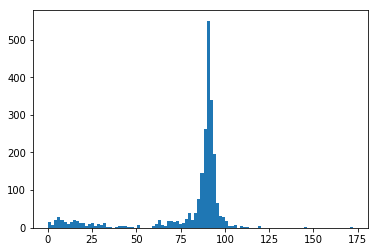

In [54]:
masses = compute_mass(E1, E2, px1, px2, py1, py2, pz1, pz2)

import matplotlib.pyplot
matplotlib.pyplot.hist(masses, bins=100);

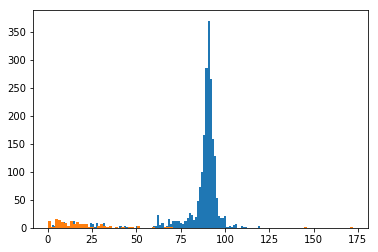

In [58]:
# Most of the time, you do a single operation on all data, plot the result, then do the next operation.

good_masses = masses[Q1 != Q2]
matplotlib.pyplot.hist(good_masses, bins=100);

bad_masses = masses[Q1 == Q2]
matplotlib.pyplot.hist(bad_masses, bins=100);

<br>

This style of programming is found _primarily_ in data analysis languages, pioneered by APL.

<br>

<center><img src="img/apl-timeline.png" width="80%"></center>

### APL discovered the mistake of being too concise

<img src="img/tshirt.jpg" width="20%" align="right">

Conway's Game of Life is one line of APL code:

```
life ← {↑1　⍵∨.∧3　4=+/,¯1　0　1∘.⊖¯1　0　1∘.⌽⊂⍵}
```

"Map" is implicit, "reduce" is a slash, functions are symbols.

<center><img src="img/apl-keyboard.jpg" width="40%"></center>

<br><br><br>

### Numpy (generations later) strikes a balance: the right amount of conciseness

| APL | <br> | Numpy |
|:---:|:----:|:-----:|
| <tt>ι4</tt> | <br> | <tt>numpy.arange(4)</tt> |
| <tt>(3+ι4)</tt> | <br> | <tt>numpy.arange(4) + 3</tt> |
| <tt>+/(3+ι4)</tt> | <br> | <tt>(numpy.arange(4) + 3).sum()</tt> |
| <tt>m ← +/(3+ι4)</tt> | <br> | <tt>m = (numpy.arange(4) + 3).sum()</tt> |

<br><br><br>

In [60]:
# APL game of life:
# life ← {↑1　⍵∨.∧3　4=+/,¯1　0　1∘.⊖¯1　0　1∘.⌽⊂⍵}

# Numpy game of life:
world = (numpy.random.uniform(0, 1, (20, 100)) < 0.3)                   # fill 30% of 20×100 grid

def step(world):
    "Step the world forward."
    neighbors = numpy.zeros(world.shape, dtype=int)                     # initialize neighors count
    for dir1 in -1, 0, 1:
        for dir2 in -1, 0, 1:
            if not (dir1 == 0 and dir2 == 0):                           # add each rolled direction
                neighbors += numpy.roll(numpy.roll(world, dir1, axis=0), dir2, axis=1)

    survivors = ((world == 1) & (neighbors > 1) & (neighbors < 4))      # old cells that survive
    births    = ((world == 0) & (neighbors == 3))                       # new cells that are born

    return (births | survivors).astype(world.dtype)                     # union as booleans

def show(world):
    "Print the world."
    print("\n".join("|" + "".join("*" if y else " " for y in x) + "|" for x in world))

In [146]:
world = step(world)
show(world)

|  *           ** ***          * *       ***                                         **     ***      |
| *            **  * *          *        *    *                                       **    ** *     |
| ***           *           *            *  **             *                  *        ****          |
|  **            *         * *            *               **                  *          *           |
|                                                        ** *                 *          *     *     |
|                         *   *   **             *                                           *  *    |
|                                 **             *        * *             ***                * **    |
|       *             **   * *                             **    **                         *  **    |
|     **              **    *             **     *       * **     *                                  |
|     ****   **                                  *        **   * *       

In [149]:
# Pandas organizes Numpy operations into convenient tables.

import pandas
df = pandas.DataFrame(arrays)
df

,Type,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,b'GT',148031,10507008,82.201866,-41.195288,17.433244,-68.964962,44.7322,-1.217690,2.741260,1,60.621875,34.144437,-16.119525,-47.426984,38.8311,-1.051390,-0.440873,-1,82.462692
1,b'TT',148031,10507008,62.344929,35.118050,-16.570362,-48.775247,38.8311,-1.051390,-0.440873,-1,82.201866,-41.195288,17.433244,-68.964962,44.7322,-1.217690,2.741260,1,83.626204
2,b'GT',148031,10507008,62.344929,35.118050,-16.570362,-48.775247,38.8311,-1.051390,-0.440873,-1,81.582778,-40.883323,17.299297,-68.447255,44.7322,-1.217690,2.741260,1,83.308465
3,b'GG',148031,10507008,60.621875,34.144437,-16.119525,-47.426984,38.8311,-1.051390,-0.440873,-1,81.582778,-40.883323,17.299297,-68.447255,44.7322,-1.217690,2.741260,1,82.149373
4,b'GT',148031,105238546,41.826389,22.783582,15.036444,-31.689894,27.2981,-0.990688,0.583351,1,49.760726,-20.177373,-9.354149,44.513955,21.8913,1.444340,-2.707650,-1,90.469123
5,b'TT',148031,105238546,48.981407,-19.862307,-9.204225,43.817098,21.8913,1.444340,-2.707650,-1,41.826389,22.783582,15.036444,-31.689894,27.2981,-0.990688,0.583351,1,89.757663
6,b'GT',148031,105238546,48.981407,-19.862307,-9.204225,43.817098,21.8913,1.444340,-2.707650,-1,41.841299,22.790561,15.040756,-31.702509,27.2981,-0.990688,0.583351,1,89.773943
7,b'GG',148031,105238546,49.760726,-20.177373,-9.354149,44.513955,21.8913,1.444340,-2.707650,-1,41.841299,22.790561,15.040756,-31.702509,27.2981,-0.990688,0.583351,1,90.485532
8,b'GT',148031,105485643,132.780755,71.143711,29.542308,-108.150553,77.0336,-1.140270,0.393582,1,87.795659,50.870937,-51.669728,-49.502056,72.7634,-0.637934,-0.793162,-1,91.773701
9,b'TT',148031,105485643,88.078330,51.050486,-51.849400,-49.631328,72.7634,-0.637934,-0.793162,-1,132.780755,71.143711,29.542308,-108.150553,77.0336,-1.140270,0.393582,1,91.948820


In [151]:
df["mass"] = compute_mass(df.E1, df.E2, df.px1, df.px2, df.py1, df.py2, df.pz1, df.pz2)

df[["mass", "Q1", "Q2"]]

,mass,Q1,Q2
0,82.462692,1,-1
1,83.626204,-1,1
2,83.308465,-1,1
3,82.149373,-1,1
4,90.469123,1,-1
5,89.757663,-1,1
6,89.773943,-1,1
7,90.485532,-1,1
8,91.773701,1,-1
9,91.948820,-1,1


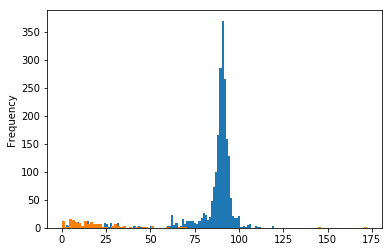

In [155]:
# Pandas features, like selection inside square brackets, are really just Numpy features.

df["mass"][df.Q1 != df.Q2].plot.hist(bins=100)
df["mass"][df.Q1 == df.Q2].plot.hist(bins=100)

<br><br><br><br><br>

# Numpy 101

<br><br><br><br><br>

In [159]:
# Basic data type in Numpy: the n-dimensional array.

import numpy

a = numpy.array([2**30, 2**30 + 2**26, -1, 0, 2**30 + 2**24, 2**30 + 2**20], numpy.int32)
# a = a.view(numpy.float32)
# a = a.reshape((2, 3))

print("data:\n", a, end="\n\n")
print("type:", type(a), end="\n\n")
print("dtype (type of the data it contains):", a.dtype, end="\n\n")
print("shape: (size of each dimension):", a.shape, end="\n\n")

data:
 [1073741824 1140850688         -1          0 1090519040 1074790400]

type: <class 'numpy.ndarray'>

dtype (type of the data it contains): int32

shape: (size of each dimension): (6,)



In [161]:
# Basic function type in Numpy: the universal function or "ufunc".

print("func:", numpy.sqrt)
print("type:", type(numpy.sqrt))

with numpy.errstate(invalid="ignore"):    # to silently let sqrt(-1) → nan
    b = numpy.sqrt(a)                     # call the ufunc!

print()
for ai, bi in zip(a, b):
    print(f"{ai:12.1f}      \u2192 {bi:12.1f}")

func: <ufunc 'sqrt'>
type: <class 'numpy.ufunc'>

1073741824.0      →      32768.0
1140850688.0      →      33776.5
        -1.0      →          nan
         0.0      →          0.0
1090519040.0      →      33023.0
1074790400.0      →      32784.0


<br><br>

**Characteristics of a ufunc:**

   * input arrays (one or more) must have the same `shape`
   * output array will have the same `shape`
   * the same function is applied to every input element: `out[i] = f(in[i])`
   * you don't know the order in which they're applied, or if some are applied simultaneously (vectorized).

<br><br>

Numpy has non-ufunc functions (e.g. "roll"), but ufuncs occupy a special place.

<br><br>

In [162]:
# Basic array slicing is the same as Python list slicing

a = numpy.array([0.0, 1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9])

for expr in "a[3]      ", "a[3:]     ", "a[:3]     ", "a[3:7]    ", "a[3:7:2]  ", "a[::2]    ":
    print(expr, "=", eval(expr))

print()
for expr in "a[-3]     ", "a[-3:]    ", "a[:-3]    ", "a[-7:-3]  ", "a[-7:-3:2]", "a[::-1]   ":
    print(expr, "=", eval(expr))

a[3]       = 3.3
a[3:]      = [3.3 4.4 5.5 6.6 7.7 8.8 9.9]
a[:3]      = [0.  1.1 2.2]
a[3:7]     = [3.3 4.4 5.5 6.6]
a[3:7:2]   = [3.3 5.5]
a[::2]     = [0.  2.2 4.4 6.6 8.8]

a[-3]      = 7.7
a[-3:]     = [7.7 8.8 9.9]
a[:-3]     = [0.  1.1 2.2 3.3 4.4 5.5 6.6]
a[-7:-3]   = [3.3 4.4 5.5 6.6]
a[-7:-3:2] = [3.3 5.5]
a[::-1]    = [9.9 8.8 7.7 6.6 5.5 4.4 3.3 2.2 1.1 0. ]


In [163]:
# But multidimensional arrays can be sliced with an extension of this syntax.
a = numpy.array([[ 0,  1,  2,  3,  4,  5],
                 [10, 11, 12, 13, 14, 15],
                 [20, 21, 22, 23, 24, 25],
                 [30, 31, 32, 33, 34, 35]])
for expr in "a[2:, 1:]", "a[:, 1:-1]", "a[::2, ::2]", "a[:, 3]":
    print(expr, " =\n", eval(expr), sep="", end="\n\n")

a[2:, 1:] =
[[21 22 23 24 25]
 [31 32 33 34 35]]

a[:, 1:-1] =
[[ 1  2  3  4]
 [11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]]

a[::2, ::2] =
[[ 0  2  4]
 [20 22 24]]

a[:, 3] =
[ 3 13 23 33]



In [164]:
# Exercise: slice "a" so that it is identical to "b"

a = numpy.arange(30).reshape((3, 2, 5))
b = numpy.array([[4, 9], [24, 29]])

asliced = a   # a[?, ?, ?]

print("a[?, ?, ?] =", asliced, sep="\n", end="\n\n")
print("b =", b, sep="\n")

a[?, ?, ?] =
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]]

b =
[[ 4  9]
 [24 29]]


In [165]:
# Remember masses[Q1 != Q2]? That was a special case of (advanced) slicing:

a    = numpy.array([  0.0,   1.1,   2.2,   3.3,   4.4,  5.5,   6.6,  7.7,   8.8,  9.9])
mask = numpy.array([False, False, False, False, False, True, False, True, False, True])
#                                                       5.5          7.7          9.9

for expr in "a[mask]", "a < 5", "a[a < 5]":
    print(expr, " =\n", eval(expr), sep="", end="\n\n")

a[mask] =
[5.5 7.7 9.9]

a < 5 =
[ True  True  True  True  True False False False False False]

a[a < 5] =
[0.  1.1 2.2 3.3 4.4]



In [193]:
def compute_eta(E, pz):
    return numpy.log((E + pz)/(E - pz))/2

etaZ = compute_eta(E1 + E2, pz1 + pz2)

mask1 = (abs(etaZ) < 1)
mask2 = mask1[Q1 != Q2]

# Exercise: apply mask1 and mask2 to masses
matplotlib.pyplot.hist(masses[mask1][mask2], bins=100);

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1374 but corresponding boolean dimension is 2147

In [194]:
# Arrays of integers can also be used as indexes.

a = numpy.array([0.0, 1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9])

print("selects elements, possibly out of order")
index = numpy.array([3, 5, 0, 9])
print("a[[3, 5, 0, 9]] =", a[index])

print("\nmay use negative indexing, just like single integers and slices")
index = numpy.array([3, 5, 0, -1, -2, -3])
print("a[[3, 5, 0, -1, -2, -3]] =", a[index])

print("\nmay include repetitions(!)")
index = numpy.array([3, 5, 0, 9, 9, 9, 3, 5, 0])
print("a[[3, 5, 0, 9, 9, 9, 3, 5, 0]] =", a[index])

selects elements, possibly out of order
a[[3, 5, 0, 9]] = [3.3 5.5 0.  9.9]

may use negative indexing, just like single integers and slices
a[[3, 5, 0, -1, -2, -3]] = [3.3 5.5 0.  9.9 8.8 7.7]

may include repetitions(!)
a[[3, 5, 0, 9, 9, 9, 3, 5, 0]] = [3.3 5.5 0.  9.9 9.9 9.9 3.3 5.5 0. ]


In [198]:
# What is integer indexing good for?

permutation = etaZ.argsort()                            # try also abs(etaZ).argsort()

print(f"\n\npermutation:\n{permutation}")

print(f"\n\nsorted etaZ:\n{etaZ[permutation]}")

print(f"\n\nmasses sorted by etaZ:\n{masses[permutation]}")



permutation:
[ 594   71 1447 ...  564  561 1332]


sorted etaZ:
[-2.20861271 -2.15576398 -2.06939557 ...  2.09490763  2.09549142
  2.23921074]


masses sorted by etaZ:
[1.38595961 0.61617839 6.70683147 ... 1.31566591 1.32027808 1.75907992]


In [199]:
# Exercise: dense array → sparse array → dense array.

dense1 = numpy.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 4, 1, 0, 3, 0,
                      1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) * 1.1

sparse_indexes = numpy.nonzero(dense1)[0]
sparse_values  = dense1[sparse_indexes]
print("sparse indexes:", sparse_indexes, "\nsparse values: ", sparse_values)

dense2 = numpy.zeros(len(dense1))
# dense2[???] = ???                       # what do you need to put on this line
print("dense:", dense1, sep="\n")         # to get dense2 == dense1 printed on this line?

sparse indexes: [37 38 40 45 46 48 50 51 53 58] 
sparse values:  [1.1 2.2 1.1 4.4 1.1 3.3 1.1 2.2 1.1 1.1]
dense:
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  1.1 2.2 0.  1.1 0.  0.  0.  0.  4.4 1.1 0.  3.3 0.  1.1 2.2 0.  1.1
 0.  0.  0.  0.  1.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]


In [200]:
# Just as masking with booleans is a generalization of slicing...

def slice2mask(a, s):
    start, stop, step = s.indices(len(a))
    if step > 0:
        return numpy.array([start <= i < stop and (i - start) % step == 0 for i in range(len(a))])
    else:
        raise ValueError("masking is only a generalization of slices with positive steps")

a = numpy.array([0.0, 1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9])

s = slice(3, None, 2)   # equivalent to [3::2]

mask = slice2mask(a, s)

print("mask    =", mask)
print("a[s]    =", a[s])
print("a[mask] =", a[mask])

mask    = [False False False  True False  True False  True False  True]
a[s]    = [3.3 5.5 7.7 9.9]
a[mask] = [3.3 5.5 7.7 9.9]


In [201]:
# ...indexing with integers is a generalization of masking.

def mask2index(mask):
    return numpy.nonzero(mask)[0]

a = numpy.array([0.0, 1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9])

mask = [False, False, False, True, False, True, False, True, False, True]

index = mask2index(mask)

print("index    =", index)
print("a[mask]  =", a[mask])
print("a[index] =", a[index])

index    = [3 5 7 9]
a[mask]  = [3.3 5.5 7.7 9.9]
a[index] = [3.3 5.5 7.7 9.9]


In [202]:
# Indexing with integers is also like composing functions of integers from 0 up to array length.

def f(x):
    return x**2 - 5*x + 10                              # some non-negative function

def g(y):
    return max(0, 2*y - 10) + 3                         # another non-negative function

F   = numpy.array([f(i) for i in numpy.arange(10)])     # sample f at 10 elements
G   = numpy.array([g(i) for i in numpy.arange(100)])    # sample g at enough elements to include max(f)
GoF = numpy.array([g(f(i)) for i in numpy.arange(10)])  # sample g∘f at 10 elements

print("G\u2218F =", G[F])
print("g\u2218f =", GoF)

G∘F = [13  5  3  3  5 13 25 41 61 85]
g∘f = [13  5  3  3  5 13 25 41 61 85]


In [203]:
# Integer indexing is surprisingly versatile: consider this text corpous (removing punctuation).

text = """Four score and seven years ago our fathers brought forth on this continent, a new nation,
conceived in Liberty, and dedicated to the proposition that all men are created equal.

Now we are engaged in a great civil war, testing whether that nation, or any nation so conceived and
so dedicated, can long endure. We are met on a great battle-field of that war. We have come to
dedicate a portion of that field, as a final resting place for those who here gave their lives that
that nation might live. It is altogether fitting and proper that we should do this.

But, in a larger sense, we can not dedicate—we can not consecrate—we can not hallow—this ground. The
brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add
or detract. The world will little note, nor long remember what we say here, but it can never forget
what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which
they who fought here have thus far so nobly advanced. It is rather for us to be here dedicated to the
great task remaining before us—that from these honored dead we take increased devotion to that cause
for which they gave the last full measure of devotion—that we here highly resolve that these dead
shall not have died in vain—that this nation, under God, shall have a new birth of freedom—and that
government of the people, by the people, for the people, shall not perish from the earth."""

words = text.replace(".", " ").replace(",", " ").replace("-", " ").replace("\u2014", " ").split()

In [204]:
# Dictionary encoding: for compression or textual analysis (e.g. with machine learning).

words = numpy.array(words)
dictionary, index = numpy.unique(words, return_inverse=True)

print("len(words) =", len(words), "\nwords[:25] =\n" + str(words[:25]))
print("\nlen(dictionary) =", len(dictionary), "\ndictionary[:25] =\n" + str(dictionary[:25]))
print("\nlen(index) =", len(index), "\nindex[:25] =\n" + str(index[:25]))

len(words) = 272 
words[:25] =
['Four' 'score' 'and' 'seven' 'years' 'ago' 'our' 'fathers' 'brought'
 'forth' 'on' 'this' 'continent' 'a' 'new' 'nation' 'conceived' 'in'
 'Liberty' 'and' 'dedicated' 'to' 'the' 'proposition' 'that']

len(dictionary) = 142 
dictionary[:25] =
['But' 'Four' 'God' 'It' 'Liberty' 'Now' 'The' 'We' 'a' 'above' 'add'
 'advanced' 'ago' 'all' 'altogether' 'and' 'any' 'are' 'as' 'battle' 'be'
 'before' 'birth' 'brave' 'brought']

len(index) = 272 
index[:25] =
[  1 109  15 111 141  12  94  49  24  55  92 124  34   8  86  84  31  69
   4  15  38 127 120 102 119]


In [205]:
# Restoring a text from its dictionary encoding is just an application of integer indexing.

# index             : positions in corpus → integer codes
# dictionary        : integer codes       → words
# dictionary[index] : positions in corpus → words

dictionary[index]

array(['Four', 'score', 'and', 'seven', 'years', 'ago', 'our', 'fathers',
       'brought', 'forth', 'on', 'this', 'continent', 'a', 'new',
       'nation', 'conceived', 'in', 'Liberty', 'and', 'dedicated', 'to',
       'the', 'proposition', 'that', 'all', 'men', 'are', 'created',
       'equal', 'Now', 'we', 'are', 'engaged', 'in', 'a', 'great',
       'civil', 'war', 'testing', 'whether', 'that', 'nation', 'or',
       'any', 'nation', 'so', 'conceived', 'and', 'so', 'dedicated',
       'can', 'long', 'endure', 'We', 'are', 'met', 'on', 'a', 'great',
       'battle', 'field', 'of', 'that', 'war', 'We', 'have', 'come', 'to',
       'dedicate', 'a', 'portion', 'of', 'that', 'field', 'as', 'a',
       'final', 'resting', 'place', 'for', 'those', 'who', 'here', 'gave',
       'their', 'lives', 'that', 'that', 'nation', 'might', 'live', 'It',
       'is', 'altogether', 'fitting', 'and', 'proper', 'that', 'we',
       'should', 'do', 'this', 'But', 'in', 'a', 'larger', 'sense', 'we',
     

<br><br>

## Summary of slicing

   * **if X is an integer:** selects individual elements;
   * **if X is a slice:** selects a contiguous or regularly strided subrange (strides can be backward);
   * **if X is a tuple** (any commas between square brackets): applies selections to multiple dimensions;
   * **if X is a boolean array:** filters arbitrarily chosen elements (preserving order);
   * **if X is an integer array:** applies a function of integers, arbitrarily chosen, in any order, and may have duplicates.

<br>

See [Numpy's advanced indexing documentation](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#advanced-indexing) for more. (I didn't talk about slicing by a tuple of arrays.)

<br><br>